# Setup


In [2]:
import xarray   as xr
import pandas   as pd
import numpy    as np
import datetime as dt

import getpass
from pydap.client import open_url
from pydap.cas.get_cookies import setup_session

## CMEMS function to get access to the thredds server

https://help.marine.copernicus.eu/en/articles/6522070-what-is-opendap-and-how-to-access-copernicus-marine-data

https://help.marine.copernicus.eu/en/articles/6135460-how-to-configure-a-simple-opendap-access-directly-in-python

https://help.marine.copernicus.eu/en/articles/5182598-how-to-consume-the-opendap-api-and-cas-sso-using-python

In [3]:
def copernicusmarine_datastore(dataset, username, password):
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    # user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    #, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    return data_store

# Open the Thredds (OpenDAP) "channels"

In [4]:
CHL_daily = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v6.0-DAILY')
CHL_daily

<xarray.Dataset>
Dimensions:             (lat: 4320, lon: 8640, time: 9314)
Coordinates:
  * lat                 (lat) float64 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                 (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time                (time) datetime64[ns] 1997-09-04 ... 2023-03-31
Data variables: (12/94)
    crs                 int32 ...
    MERIS_nobs          (time, lat, lon) float32 ...
    MODISA_nobs         (time, lat, lon) float32 ...
    OLCI-A_nobs         (time, lat, lon) float32 ...
    OLCI-B_nobs         (time, lat, lon) float32 ...
    Rrs_412             (time, lat, lon) float32 ...
    ...                  ...
    water_class4        (time, lat, lon) float32 ...
    water_class5        (time, lat, lon) float32 ...
    water_class6        (time, lat, lon) float32 ...
    water_class7        (time, lat, lon) float32 ...
    water_class8        (time, lat, lon) float32 ...
    water_class9        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creation_date:                     20230416T122212Z
    creator_email:                     help@esa-oceancolour-cci.org
    ...                                ...
    time_coverage_end:                 202303302359Z
    time_coverage_resolution:          P1D
    time_coverage_start:               202303300000Z
    title:                             ESA CCI Ocean Colour Product
    tracking_id:                       c6a7f1a5-be7b-4fb6-acfa-8b7c1319a4c6
    NCO:                               netCDF Operators version 4.7.5 (Homepa...

In [5]:
CHL_monthly = xr.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v6.0-MONTHLY')
CHL_monthly

<xarray.Dataset>
Dimensions:             (lat: 4320, lon: 8640, time: 307)
Coordinates:
  * lat                 (lat) float64 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                 (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time                (time) datetime64[ns] 1997-09-04 ... 2023-03-01
Data variables: (12/94)
    crs                 int32 ...
    Rrs_412             (time, lat, lon) float32 ...
    Rrs_412_bias        (time, lat, lon) float32 ...
    Rrs_412_rmsd        (time, lat, lon) float32 ...
    Rrs_443             (time, lat, lon) float32 ...
    Rrs_443_bias        (time, lat, lon) float32 ...
    ...                  ...
    MODISA_nobs_sum     (time, lat, lon) float32 ...
    OLCI-A_nobs_sum     (time, lat, lon) float32 ...
    OLCI-B_nobs_sum     (time, lat, lon) float32 ...
    SeaWiFS_nobs_sum    (time, lat, lon) float32 ...
    VIIRS_nobs_sum      (time, lat, lon) float32 ...
    total_nobs_sum      (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    time_coverage_resolution:          P1M
    time_coverage_duration:            P1M
    start_date:                        01-FEB-2023 00:00:00.000000
    stop_date:                         28-FEB-2023 23:59:00.000000
    time_coverage_start:               202302010000Z
    time_coverage_end:                 202302282359Z

## SST: OSTIA

ProductA (2012-2020):
https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/services
cmems_mod_glo_phy_my_0.083_P1D-m_202112
cmems_mod_glo_phy_my_0.083_P1M-m_202112

ProductB (2021-2022):

https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/services
cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m_202211
cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m_202211

In [7]:
USERNAME = input('Enter your username:') #afarinas
PASSWORD = getpass.getpass('Enter your password:') #Campanila8

DATASET_ID = 'cmems_mod_glo_phy_my_0.083_P1D-m'

SST12_20_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST12_20_daily = xr.open_dataset(SST12_20_daily)
SST12_20_daily

Enter your username: afarinas
Enter your password: ········


FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

In [ ]:
DATASET_ID = 'cmems_mod_glo_phy_my_0.083_P1M-m'

ALL12_20_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

ALL12_20_monthly = xr.open_dataset(ALL12_20_monthly)
ALL12_20_monthly

In [ ]:
DATASET_ID = 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m' # SST for 3D, so no surface

SST21_22_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST21_22_daily = xr.open_dataset(SST21_22_daily)
SST21_22_daily

In [ ]:
DATASET_ID = 'cmems_mod_glo_phy-thetao_anfc_0.083deg_P1M-m' # SST for 3D, so no surface

SST21_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SST21_22_monthly = xr.open_dataset(SST21_22_monthly)
SST21_22_monthly

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR DAILY SSH

DATASET_ID = 'cmems_mod_glo_phy_anfc_0.083deg_P1D-m'

SSH20_22_daily = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH20_22_daily = xr.open_dataset(SSH20_22_daily)
SSH20_22_daily

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR MONTHLY SSH

DATASET_ID = 'cmems_mod_glo_phy_anfc_0.083deg_P1M-m'

SSH20_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH20_22_monthly = xr.open_dataset(SSH20_22_monthly)
SSH20_22_monthly

In [ ]:
# NOT USED! OTHER POSSIBLE PRODUCT FOR DAILY SST FOR THE WHOLE PERIOD

DATASET_ID = 'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2'

SSH12_22_monthly = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

SSH12_22_monthly = xr.open_dataset(SSH12_22_monthly)
SSH12_22_monthly


# Read sightings table with dates and positions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('C:/Users\Andrea\Desktop\Datos Ágatha Modelo grande\Points_habitat_time_position2.csv')

#df['time'] = pd.to_datetime(df[["year", "month", "day"]])
df

## Loop through dataframe and assign the CHL and SST values

In [ ]:
#df['CHL_daily']    = np.nan
#df['CHL_monthly']    = np.nan
df['SST12_20_daily'] = np.nan
#df['SST12_20_monthly'] = np.nan
#df['SST21_22_daily'] = np.nan
#df['SST21_22_monthly'] = np.nan
#df['SSH12_20_daily'] = np.nan
#df['SSH12_20_monthy'] = np.nan
#df['SSH21_22_daily'] = np.nan
#df['SSH21_22_monthly'] = np.nan
#df['SSH12_22_daily'] = np.nan
#df['SSH12_22_monthly'] = np.nan
for i in range(0,len(df)):
  ti = df['time'][i]; lo = df['lon'][i]; la = df['lat'][i]
  #df.at[i,'CHL_daily']    =  CHL_daily.chlor_a.sel(    time=ti, lon=lo, lat=la, method='nearest').values
  #df.at[i,'CHL_monthly']    =  CHL_monthly.chlor_a.sel(    time=ti, lon=lo, lat=la, method='nearest').values
  df.at[i,'SST12_20_daily'] =  ALL12_20_daily.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST12_20_monthly'] =  ALL12_20_monthly.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST21_22_daily'] =  SST21_22_daily.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SST21_22_monthly'] =  (SST21_22_monthly.thetao.sel(time=ti, longitude=lo, latitude=la, depth=0.494025, method='nearest')[0:3000 , ]) .values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_20_daily'] =  ALL12_20_daily.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_20_monthly'] =  ALL12_20_monthly.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH21_22_daily'] =  SSH21_22_daily.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius # add ", depth=0.494025" if 3D variable with values at different depths
  #df.at[i,'SSH21_22_monthly'] =  SSH21_22_monthly.zos.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_22_daily'] =  SSH12_22_daily.sla.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  #df.at[i,'SSH12_22_monthly'] =  SSH12_22_monthly.sla.sel(time=ti, longitude=lo, latitude=la, method='nearest').values # - 273.15  # convert to Celsius
  print(ti, lo, la, '---> ',  df['SST12_20_daily'][i])
        #, df['CHL_daily'][i], df['CHL_monthly'][i], df['SST12_20_daily'][i], df['SST12_20_monthly'][i],df['SSH12_20_daily'][i],df['SSH12_20_monthly'][i],df['SSH20_22_daily'][i],df['SSH20_22_monthly'][i])


In [ ]:
df

## Write dataframe to disk

In [ ]:
df.to_csv('C:/Users\Andrea\Desktop\Datos Ágatha Modelo grande\SSTD_12_20.csv')


## 1.  according to (*) we should never iterate through Dataframe rows, but, if absolutely necessary, the way to iterate should be using "List Comprehensions"

(*) - https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas/55557758#55557758

In [ ]:
chl = [oc_cci.chlor_a.sel(time = row[0],lon  = row[1], lat = row[2], method='nearest').values for row in zip(df['time'],df['lon'],df['lat'])]

## 2. it should should be possible to issue the .sel() method in on run (*), but the thredds access is too slow...

 (*) - https://stackoverflow.com/questions/72179103/xarray-select-the-data-at-specific-x-and-y-coordinates

In [ ]:
chl_at_coords = oc_cci.chlor_a.sel(
    time = xr.DataArray(df.time,dims='z'),
    lon  = xr.DataArray(df.lon, dims='z'),
    lat  = xr.DataArray(df.lat, dims='z'),
    method='nearest')

chl_at_coords

In [ ]:
chl_sel.values

## NCSS - the NetCDF Subset Service (OC_CCI)

- in case there is no limitation local disk space ...

To use this service, just select the variable, region and temporal range on the [access page](https://www.oceancolour.org/thredds/ncss/grid/CCI_ALL-v5.0-1km-DAILY/dataset.html) and copy the string at the bottom, e.g.:

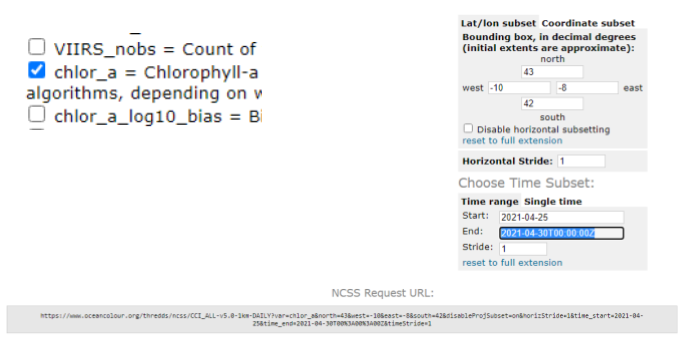

Then, simply use the linux '[wget](https://www.gnu.org/software/wget/)' command to get your subset

In [ ]:
!wget -O NW_IB_Chla_2020-2021.nc 'https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=44&west=-10&east=-8&south=40&disableProjSubset=on&horizStride=1&time_start=2020-04-30T00%3A00%3A00Z&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1&accept=netcdf'

In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset('/content/NW_IB_Chla_2020-2021.nc')
ds

In [ ]:
!wget -O mysubset.nc 'https://www.oceancolour.org/thredds/ncss/CCI_ALL-v5.0-1km-DAILY?var=chlor_a&north=43&west=-11&east=-8&south=40&horizStride=1&time_start=2021-04-01&time_end=2021-04-30T00%3A00%3A00Z&timeStride=1'

In [ ]:
ds = xr.open_dataset('mysubset.nc')
ds

In [ ]:
ds.chlor_a.isel(time=5).plot()

Remember: - passive radiometers operating on visible wavelengths don't see through clouds...